In [19]:
# Base libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     TimeSeriesSplit,
                                     cross_val_score)

# Classifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (precision_recall_curve,
                             roc_curve,
                             RocCurveDisplay,
                             ConfusionMatrixDisplay)
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             recall_score,
                             precision_score,
                             roc_auc_score,
                             auc)
from sklearn.metrics import (classification_report,
                             confusion_matrix)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load locally stored data
df = pd.read_csv('data/spy.csv', index_col=0, parse_dates=True)

# Check first 5 values
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1928-03-01,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-04-01,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-05-01,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-06-01,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-09-01,17.500000,17.500000,17.500000,17.500000,17.500000,0


In [6]:
df.shape

(23973, 6)

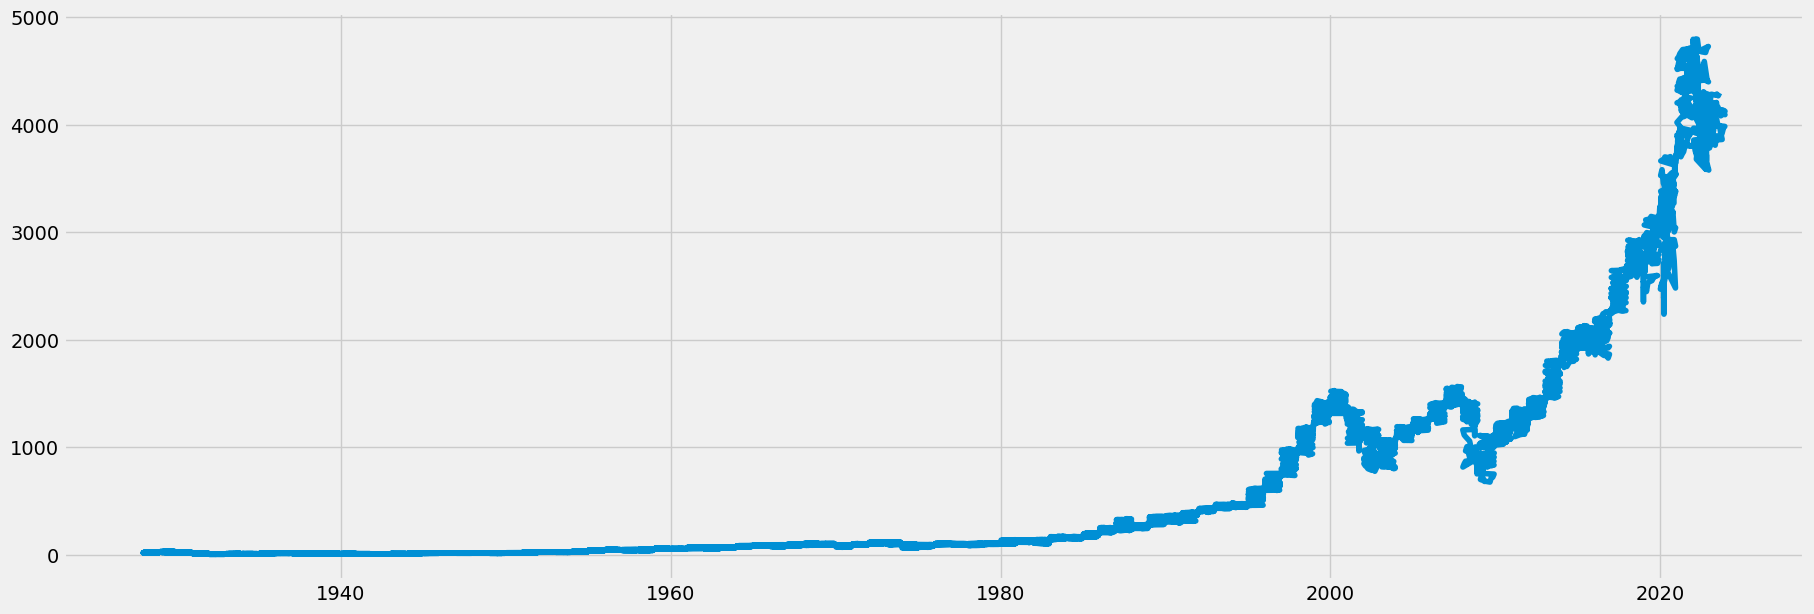

In [9]:
# Visualize data
plt.plot(df['Adj Close'])

In [10]:
# Descriptive statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,23973.000000,23973.000000,23973.000000,23973.000000,23973.000000,2.397300e+04
mean,565.797732,589.355412,582.108859,585.963759,585.963759,8.704260e+08
std,942.221043,936.343254,925.103864,931.085908,931.085908,1.592290e+09
min,0.000000,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,9.540000,24.450001,24.450001,24.450001,24.450001,1.440000e+06
50%,40.730000,102.190002,100.610001,101.419998,101.419998,1.919000e+07
75%,963.090027,972.859985,952.669983,963.390015,963.390015,8.173000e+08
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [11]:
# Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
# Predictors
df['O-C'] = df.Open - df.Close
df['H-L'] = df.High - df.Low

X = df[['O-C', 'H-L']].values
X

array([[  0.      ,   0.      ],
       [  0.      ,   0.      ],
       [  0.      ,   0.      ],
       ...,
       [-12.510254,  25.240234],
       [ 17.950195,  35.22998 ],
       [-25.240235,  36.939942]])

In [15]:
# Target - Avoid using [-1, 1], always prefer [0, 1] as class labels
y = np.where(df['Adj Close'].shift(-1) > 0.995*df['Adj Close'], 1, -1)
y

array([ 1, -1,  1, ...,  1,  1, -1])

In [16]:
# Value counts for class 1 and -1
pd.Series(y).value_counts()

 1    18324
-1     5649
dtype: int64

In [17]:
# Spliting the datasets into training and testing data
# Always keep shuffle = False for financial time series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f'Train and Test size {len(X_train)}, {len(X_test)}')

Train and Test size 19178, 4795


In [22]:
# Scale and fit the model
model = Pipeline([('Scaler', MinMaxScaler()),
                 ('Classifier', KNeighborsClassifier())])
model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('Classifier', KNeighborsClassifier())])

In [23]:
# Predicting the test dataset
y_pred = model.predict(X_test)

# Predict probabilities
y_proba = model.predict_proba(X_test)

# Verifiy the class labels
model.classes_

array([-1,  1])

In [24]:
# Predict probability
y_proba[-20:]

array([[0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8]])

In [25]:
# Predict class labels
y_pred[-20:]

array([ 1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [26]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print(f'Train accuracy: {acc_train:0.4}, Test accuracy: {acc_test:0.4}')

Train accuracy: 0.7776, Test accuracy: 0.6905
